Problem 3:
After re-analysing the dataset you found out that some investors have invested in the same startup at different number of funding rounds. So before finalising the previous list, you want to improvise it by finding the top 5 investors who have invested in different number of startups. This list will be more helpful than your previous list in finding the investment for your friend startup. Find the top 5 investors who have invested maximum number of times in different companies. That means, if one investor has invested multiple times in one startup, count one for that company. There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

Accel Partners 59
Sequoia Capital 53
Kalaari Capital 47
Blume Ventures 43
Indian Angel Network 41


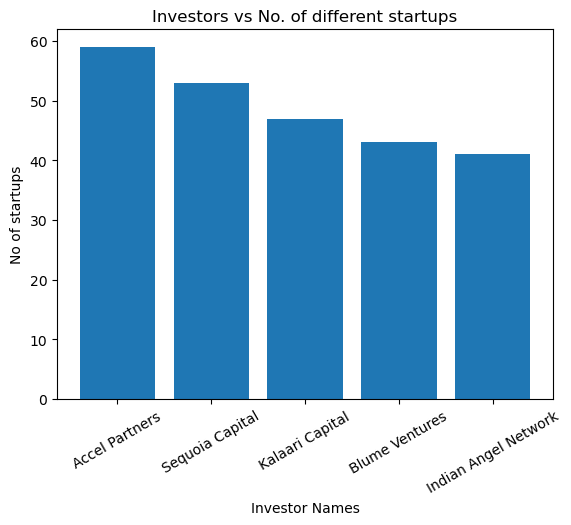

In [1]:
#importing Pandas Numpy and Matplotlib libraries
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
from collections import Counter

#reading CSV file
df= pd.read_csv("startup_funding.csv",encoding = 'utf-8')
df.dropna(subset=['Startup Name', 'Investors Name'],inplace=True)

#Correcting names of some important startups
df['Startup Name'].replace('Ola Cabs','Ola',inplace=True)
df['Startup Name'].replace("olacabs","Ola",inplace=True)
df['Startup Name'].replace("Olacabs","Ola",inplace=True)

df['Startup Name'].replace("OYO Rooms","Oyo",inplace=True)
df['Startup Name'].replace("OyoRooms","Oyo",inplace=True)
df['Startup Name'].replace("Oyorooms","Oyo",inplace=True)
df['Startup Name'].replace("Oyo Rooms","Oyo",inplace=True)

df['Startup Name'].replace("Flipkart.com","Flipkart",inplace=True)
df['Startup Name'].replace("Paytm Marketplace","Paytm",inplace=True)

#Removing Undisclosed Investors from the DataFrame
df=df[df['Investors Name']!="Undisclosed Investors"]
df=df[df['Investors Name']!="Undisclosed investors"]
df=df[df['Investors Name']!=""]

#Seperating Names of Investors based on "," split criteria
investor_names=[]
startup_names=[]
for index,row in df.iterrows():
    i=row['Investors Name']
    s=row['Startup Name']
    if i!="" and i!="Undisclosed":
        temp=i.split(",")
        for j in temp:
            investor_names.append(j.strip())
            startup_names.append(s)

df1=pd.DataFrame({'Investors Name' : investor_names, 'Startup Name': startup_names})

# fetching unique values by grouping Investor Names and Startup Names
df1 = df1.groupby('Investors Name')['Startup Name'].nunique()
k=df1.sort_values(ascending=False)[:10]
ind=[]
v=[]
c=0
for i in range(len(k)):
    if i!="" and c<5:
        if k.index[i]!="":
            print(k.index[i],k.values[i])
            ind.append(k.index[i])
            v.append(k.values[i])
            c+=1
            
#ploting bar graph for the detailed analysis
plt.bar(ind,v)
plt.xticks(rotation=30)
plt.xlabel("Investor Names")
plt.ylabel("No of startups")
plt.title("Investors vs No. of different startups")
plt.show()
